In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_openml
from sklearn import manifold

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<b>fetch_openml</b> is used to fetch dataset from openml by name or dataset id.

<b>return_X_y=True</b> returns data and target.

In [2]:
dataset = fetch_openml('mnist_784',version=1,return_X_y=True)

Pixel_values, targets = dataset

In [6]:
targets = targets.astype(int)
targets

array([5, 0, 4, ..., 4, 5, 6])

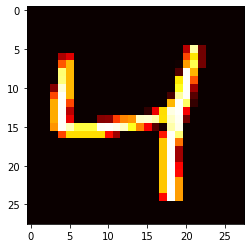

In [10]:
single_image = Pixel_values[2,:].reshape(28,28)
single_image.shape

plt.imshow(single_image,cmap='hot')

In [20]:
tSNE = manifold.TSNE(n_components=2,random_state=42)
transorm_tSNE = tSNE.fit_transform(Pixel_values[:3000,:])

transorm_tSNE.shape

(3000, 2)

In [33]:
transformed_df = pd.DataFrame(np.column_stack((transorm_tSNE,targets[:3000])),columns=["X","Y","Targets"])
# transformed_df.loc[:,"targets"] = transformed_df.targets.astype(int)
transformed_df.head(6)



,X,Y,Targets
0,-5.281551,-28.952768,5.0
1,-26.105896,-68.069321,0.0
2,-42.503582,35.580391,4.0
3,38.893967,26.663395,1.0
4,-14.770573,35.433247,9.0
5,63.997231,-1.102326,2.0


### Visualising Numbers

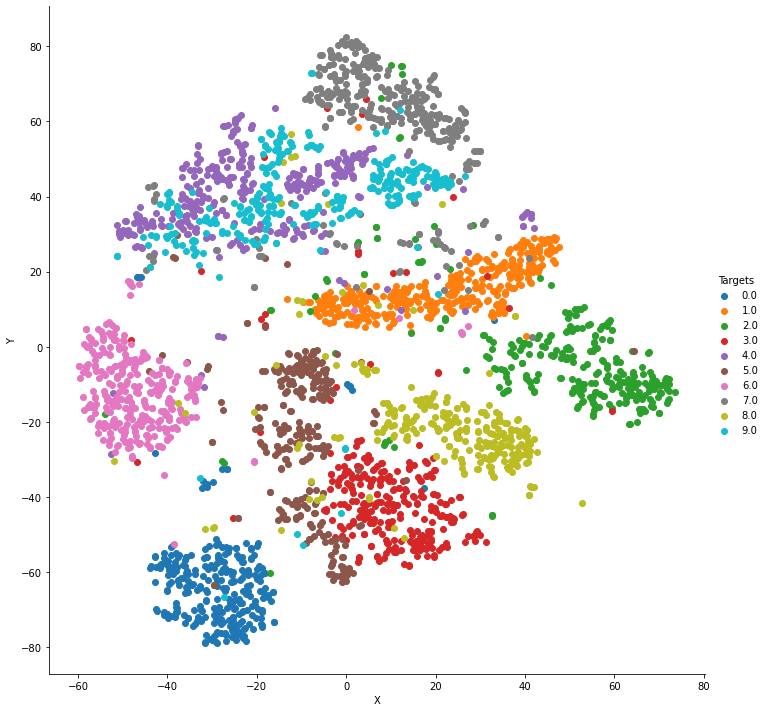

In [37]:
sns.FacetGrid(transformed_df,hue='Targets', size = 10 ).map(
                plt.scatter,'X','Y').add_legend()